<a href="https://colab.research.google.com/github/shubhamrana3/Final_Project/blob/main/Final_Project_Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/drive/MyDrive/final project/train-chennai-sale(1).csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [5]:
data.shape

(7109, 22)

In [6]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [8]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [9]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [10]:
data = data.drop('PRT_ID',axis=1)

In [11]:
data = data.drop(['REG_FEE','COMMIS'],axis=1)

In [12]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [13]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [14]:
data.AREA.values[0]

'Karapakkam'

In [15]:
data.INT_SQFT.values[0]

1004

In [16]:
oobjects = [x for x in data.columns if data[x].dtype =='O']
print(len(oobjects))
oobjects

9


['AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [17]:
num = [x for x in data.columns if data[x].dtype !='O']
print(len(num))
num

10


['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE']

In [18]:
data.shape

(7109, 19)

In [19]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

# filling the null values

In [20]:
data['N_BEDROOM'] = data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])
data['N_BATHROOM'] = data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])
data['QS_OVERALL'] = data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

In [21]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

#Correcting the Spelling Mistake

In [23]:
data.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [24]:
data['AREA'] = data['AREA'].replace(['Chrompt','Chrmpet','Chormpet','TNagar','Karapakam','Ana Nagar','Velchery','Ann Nagar','Adyr','KKNagar'],
                     ['Chrompet','Chrompet','Chrompet','T Nagar','Karapakkam','Anna Nagar','Velachery','Anna Nagar','Adyar','KK Nagar'])

In [25]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [26]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [27]:
data.DATE_SALE.describe()

count           7109
unique          2798
top       06-10-2009
freq              12
Name: DATE_SALE, dtype: object

In [28]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [29]:
data.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [30]:
data.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

In [31]:
data.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [32]:
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [33]:
data['SALE_COND'] = data['SALE_COND'].replace(['Adj Land','Ab Normal','Partiall','PartiaLl'],
                                    ['AdjLand','AbNormal','Partial','Partial'])

In [34]:
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [35]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [36]:
data['PARK_FACIL'] = data['PARK_FACIL'].replace(['Noo'],['No'])

In [37]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [38]:
len(data.DATE_BUILD.unique())

5808

In [39]:
data.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [40]:
data['BUILDTYPE'] = data['BUILDTYPE'].replace(['Other','Comercial'],
                                              ['Others','Commercial'])

In [41]:
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [42]:
data.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [43]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace(['NoSeWa','NoSewr ','All Pub'],
                                                      ['No Sewage','No Sewer','AllPub'])

In [44]:
data.UTILITY_AVAIL.value_counts()

AllPub       1887
No Sewage    1871
No Sewer     1829
ELO          1522
Name: UTILITY_AVAIL, dtype: int64

In [45]:
data.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [46]:
data['STREET'] = data['STREET'].replace(['Pavd','NoAccess'],
                                        ['Paved','No Access'])

In [47]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [48]:
data.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

#Deriving New features

In [50]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

In [51]:
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])

In [52]:
data.dtypes.value_counts()

object            7
float64           6
int64             4
datetime64[ns]    2
dtype: int64

In [53]:
data['SALE_YEAR'] = data['DATE_SALE'].dt.year
data['BUILD_YEAR'] = data['DATE_BUILD'].dt.year

In [54]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979


In [55]:
data['AGE'] = data['SALE_YEAR']- data['BUILD_YEAR']

In [56]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR,AGE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [57]:
data = data.drop(['DATE_SALE','DATE_BUILD','SALE_YEAR','BUILD_YEAR'],axis=1)

In [58]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


#Exploratory Data Analysis

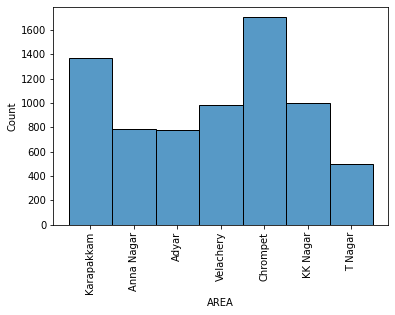

In [59]:
sns.histplot(data['AREA'])
plt.xticks(rotation='vertical')
plt.show()

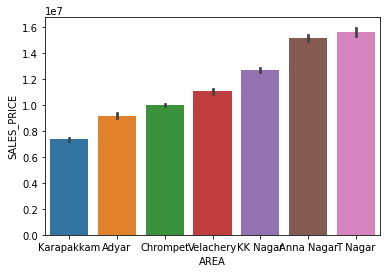

In [60]:
sns.barplot(x = data['AREA'],y=data['SALES_PRICE'],order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

Has a linear relationship

Label Encoding

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


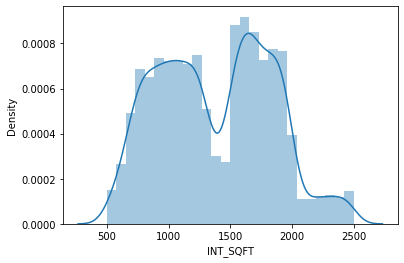

In [61]:
sns.distplot(data['INT_SQFT'])

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


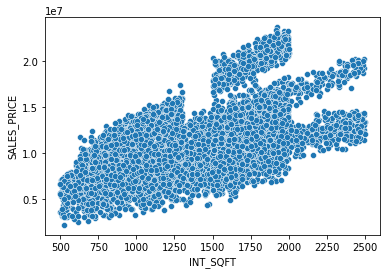

In [62]:
sns.scatterplot(data = data,x='INT_SQFT', y='SALES_PRICE')
data[['INT_SQFT','SALES_PRICE']].corr()

Has a linear relationship

No transformation required

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


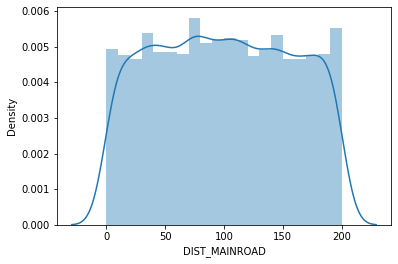

In [63]:
sns.distplot(data['DIST_MAINROAD'])

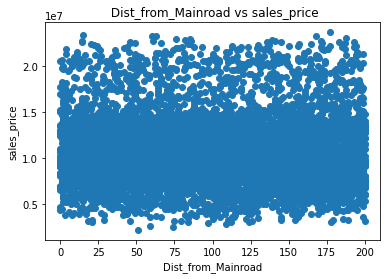

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


In [64]:
plt.scatter(data["DIST_MAINROAD"], data["SALES_PRICE"])
plt.title(" Dist_from_Mainroad vs sales_price")
plt.xlabel("Dist_from_Mainroad")
plt.ylabel("sales_price")
plt.show()
data[['DIST_MAINROAD','SALES_PRICE']].corr()

No linear relationship

We can ignore this feature as it doesn't affect our target

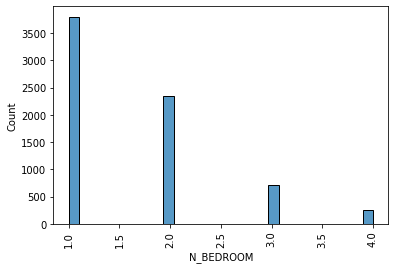

In [65]:
sns.histplot(data['N_BEDROOM'])
plt.xticks(rotation='vertical')
plt.show()

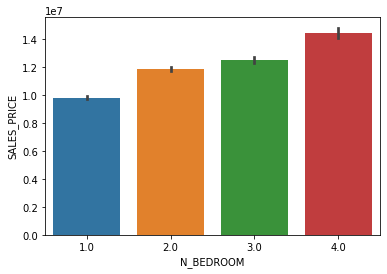

In [66]:
sns.barplot(data = data,x = 'N_BEDROOM', y = 'SALES_PRICE')

Has a linear relationship

No transformation required

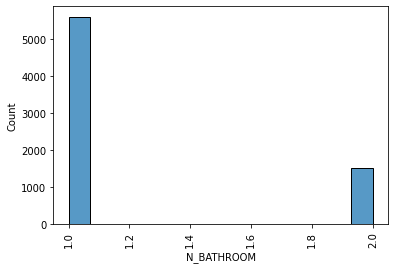

In [67]:
sns.histplot(data['N_BATHROOM'])
plt.xticks(rotation='vertical')
plt.show()

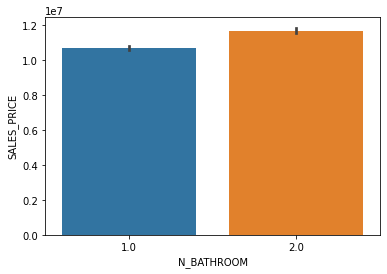

In [68]:
sns.barplot(data = data,x = 'N_BATHROOM', y = 'SALES_PRICE')

Has a linear relationship

No transformation required

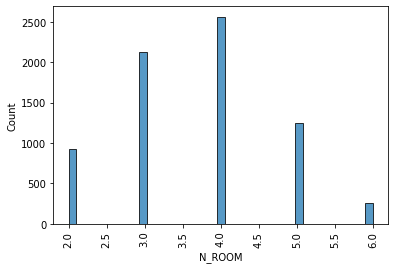

In [69]:
sns.histplot(data['N_ROOM'])
plt.xticks(rotation='vertical')
plt.show()

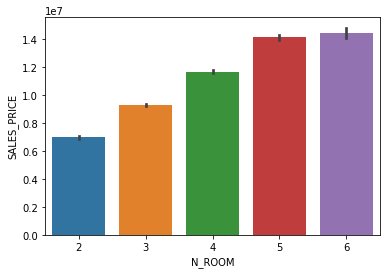

In [70]:
sns.barplot(data = data,x = 'N_ROOM', y = 'SALES_PRICE')

Has a linear relationship

No transformation required

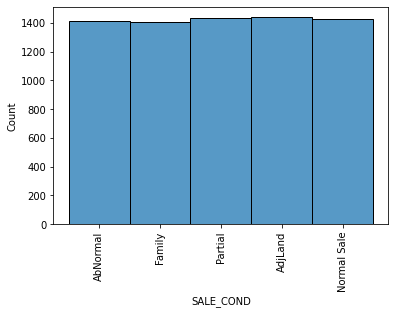

In [71]:
sns.histplot(data['SALE_COND'])
plt.xticks(rotation='vertical')
plt.show()

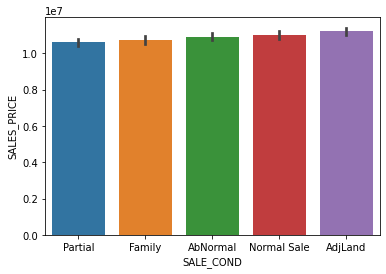

In [84]:
sns.barplot(data = data,x = 'SALE_COND', y = 'SALES_PRICE',order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

Has a linear relationship

Label Encoding

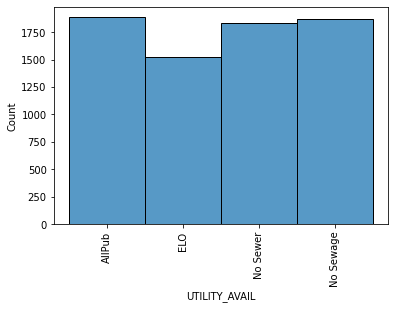

In [73]:
sns.histplot(data['UTILITY_AVAIL'])
plt.xticks(rotation='vertical')
plt.show()

,SALES_PRICE
SALES_PRICE,1.0


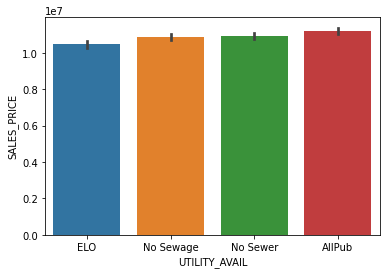

In [74]:
sns.barplot(data=data,x='UTILITY_AVAIL',y='SALES_PRICE',order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
data[['UTILITY_AVAIL','SALES_PRICE']].corr()

Has a linear relationship

Label Encoding

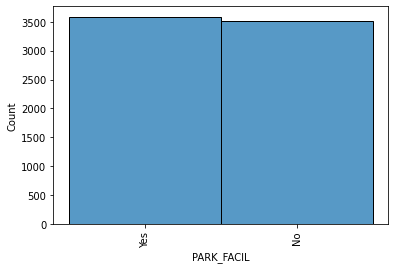

In [75]:
sns.histplot(data['PARK_FACIL'])
plt.xticks(rotation='vertical')
plt.show()

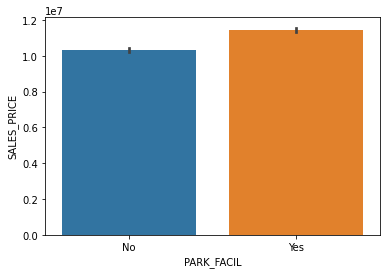

In [76]:
sns.barplot(data=data,x='PARK_FACIL',y='SALES_PRICE',order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

Has a linear relationship

Label Encoding

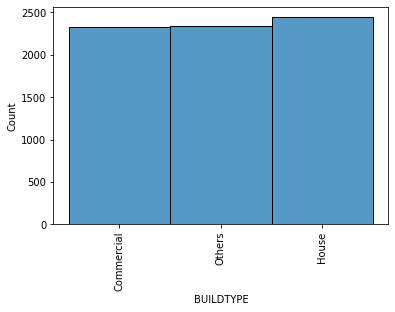

In [77]:
sns.histplot(data['BUILDTYPE'])
plt.xticks(rotation='vertical')
plt.show()

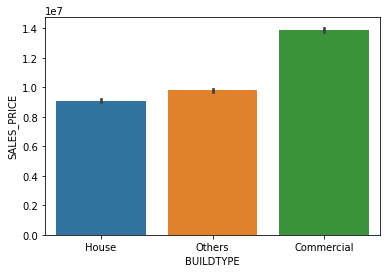

In [78]:
sns.barplot(data=data,x='BUILDTYPE',y='SALES_PRICE',order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

No linear relationship

One-hot Encoding

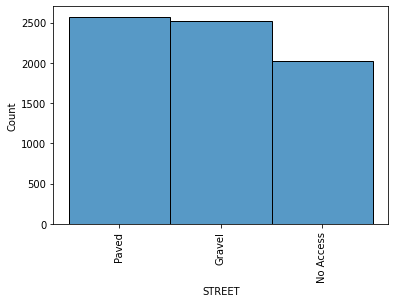

In [79]:
sns.histplot(data['STREET'])
plt.xticks(rotation='vertical')
plt.show()

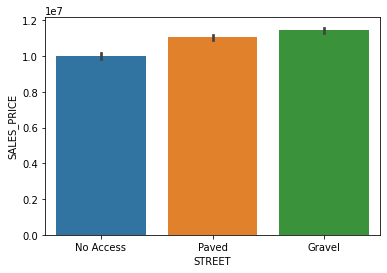

In [80]:
sns.barplot(data=data,x='STREET',y='SALES_PRICE',order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

Has a linear relationship

Label Encoding

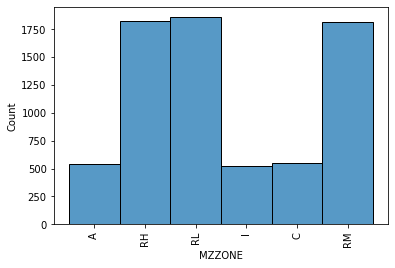

In [81]:
sns.histplot(data['MZZONE'])
plt.xticks(rotation='vertical')
plt.show()

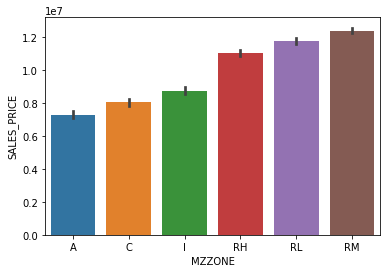

In [82]:
sns.barplot(data=data,x='MZZONE',y='SALES_PRICE',order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

Has a linear relationship

Label Encoding

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


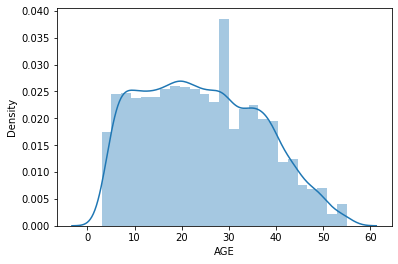

In [83]:
sns.distplot(data['AGE'])

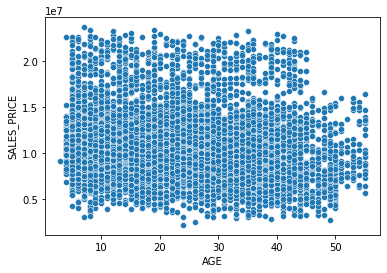

In [85]:
sns.scatterplot(data = data,x='AGE',y='SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


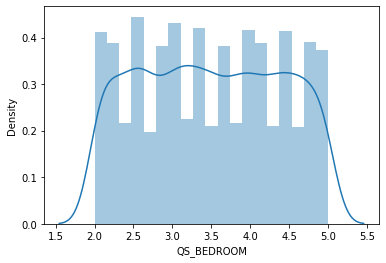

In [86]:
sns.distplot(data['QS_BEDROOM'])

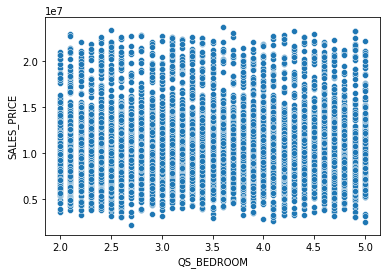

In [87]:
sns.scatterplot(data=data,x = 'QS_BEDROOM',y = 'SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


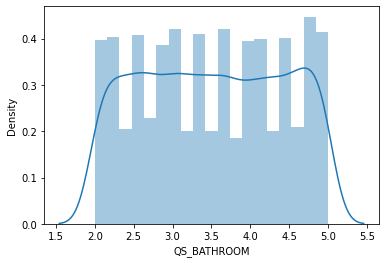

In [88]:
sns.distplot(data['QS_BATHROOM'])

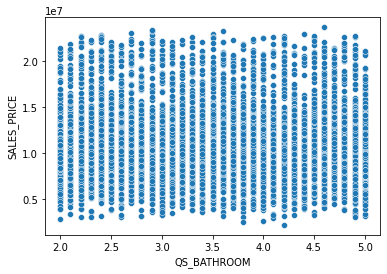

In [89]:
sns.scatterplot(data=data,x='QS_BATHROOM',y='SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


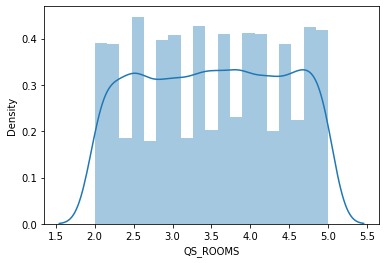

In [90]:
sns.distplot(data['QS_ROOMS'])

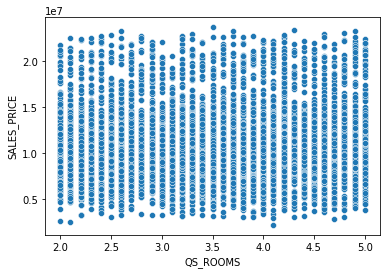

In [91]:
sns.scatterplot(data=data,x = 'QS_ROOMS',y = 'SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


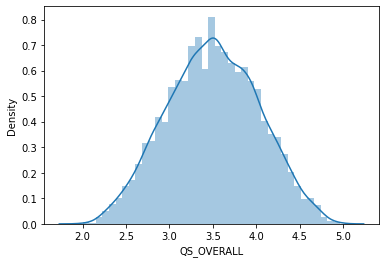

In [92]:
sns.distplot(data['QS_OVERALL'])

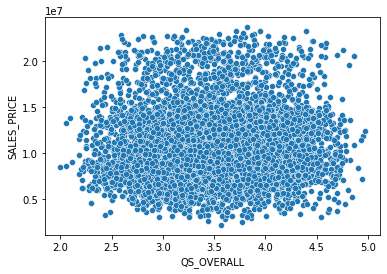

In [93]:
sns.scatterplot(data=data,x = 'QS_OVERALL',y = 'SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

In [94]:
data.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.012610
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003559
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014245,0.330987,-0.045873
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007961,0.108834,-0.020403
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033316
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516147,0.021967,0.019718
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.011377,0.021700
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628168,0.018804,-0.017971
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.516147,0.549056,0.628168,1.000000,0.020485,0.012517
SALES_PRICE,0.612125,0.018783,0.330987,0.108834,0.602760,0.021967,-0.011377,0.018804,0.020485,1.000000,-0.118842


In [95]:
data.corr()['SALES_PRICE']

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330987
N_BATHROOM       0.108834
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020485
SALES_PRICE      1.000000
AGE             -0.118842
Name: SALES_PRICE, dtype: float64

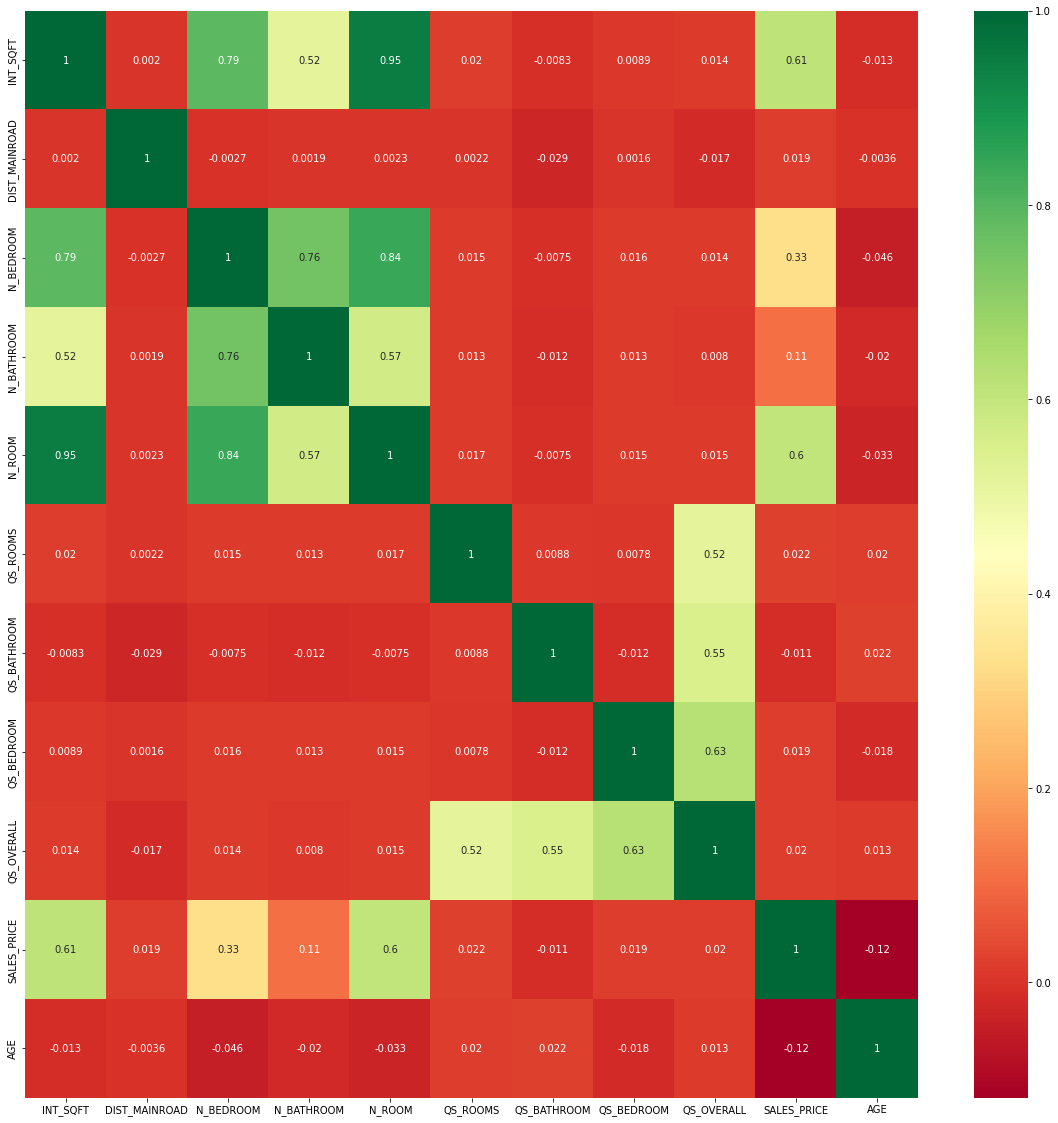

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [97]:
data.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,5353000,49
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,No Sewage,No Access,RH,3.6,4.5,3.3,3.92,10818480,9
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,No Sewage,Gravel,I,4.3,4.2,2.9,3.84,8351410,28
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,8507000,32
7108,Velachery,1896,156,3.0,2.0,5,Partial,Yes,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,9976480,44


In [98]:
oobjects = [x for x in data.columns if data[x].dtype =='O']
print(len(oobjects))
oobjects

7


['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

#Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data["AREA"]= data["AREA"].map({'Karapakkam':1,'Adyar': 2,'Chrompet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})

In [100]:
data["SALE_COND"]= data["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'AdjLand':5})

In [101]:
data['PARK_FACIL'] = data['PARK_FACIL'].map({'Yes':2,'No':1})

In [102]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].map({'ELO':1,'No Sewage':3,'No Sewer':4,'AllPub':6})

In [103]:
data['STREET'] = data['STREET'].map({'No Access':1,'Paved':3,'Gravel':4})

In [104]:
data["MZZONE"]= data["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})

In [105]:
dummies1 = pd.get_dummies(data["BUILDTYPE"])

In [106]:
data= pd.concat([data,dummies1], axis=1)

In [107]:
data = data.drop('BUILDTYPE',axis=1)

In [108]:
data = data.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [109]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1.0,1.0,3,3,2,6,3,1,7600000,44,1,0,0
1,6,1986,2.0,1.0,5,3,1,6,4,5,21717770,11,1,0,0
2,2,909,1.0,1.0,3,3,2,1,4,6,13159200,20,1,0,0
3,4,1855,3.0,2.0,5,2,1,4,3,3,9630290,22,0,0,1
4,1,1226,1.0,1.0,3,3,2,6,4,2,7406250,30,0,0,1


In [110]:
X = data.drop('SALES_PRICE',axis = 1)
y = data['SALES_PRICE']

In [111]:
X.shape,y.shape

((7109, 14), (7109,))

#Train_test_split

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 14), (1422, 14), (5687,), (1422,))

#Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9239694289388293

In [116]:
y_pred= lr.predict(X_test)
y_pred

array([14092719.41106605, 13595232.74588482, 18469347.65760298, ...,
       13781198.31855388, 15854939.65107703,  8057713.7455737 ])

In [117]:
lr.intercept_

10925361.342535608

In [118]:
lr.coef_

array([ 1043284.24417119,   651194.02018876, -1288010.89525662,
         115796.92451198,  1787402.6645317 ,   224285.52955055,
         521676.59224515,    49763.50806755,   392554.8303047 ,
         865624.32040883,  -213434.66081468,  1354046.76529728,
        -847129.9263556 ,  -502777.62385691])

In [119]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Co-efficient"])  
coef_df

,Co-efficient
AREA,1.043284e+06
INT_SQFT,6.511940e+05
N_BEDROOM,-1.288011e+06
N_BATHROOM,1.157969e+05
N_ROOM,1.787403e+06
SALE_COND,2.242855e+05
PARK_FACIL,5.216766e+05
UTILITY_AVAIL,4.976351e+04
STREET,3.925548e+05
MZZONE,8.656243e+05


In [120]:
from sklearn.metrics import r2_score
acc= r2_score(y_test,lr.predict(X_test))
acc

0.9239694289388293

#K Nearest Neighbour

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k = 4, 0.9479184353354475
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  : 1 Cross Value Accuracy : 0.9235611650474281
K value  : 2 Cross Value Accuracy : 0.9430659703693893
K value  : 3 Cross Value Accuracy : 0.9472958035709794
K value  : 4 Cross Value Accuracy : 0.9479184353354475
K value  : 5 Cross Value Accuracy : 0.947553204048646
K value  : 6 Cross Value Accuracy : 0.9466364323532452
K value  : 7 Cross Value Accuracy : 0.9451701963920047
K value  : 8 Cross Value Accuracy : 0.9445512611410031
K value  : 9 Cross Value Accuracy : 0.9434599152155719
K value  : 10 Cross Value Accuracy : 0.9423548651489828
K value  : 20 Cross Value Accuracy : 0.9310831700886659
K value  : 30 Cross Value Accuracy : 0.9215901512175867
K value  : 40 Cross Value Accuracy : 0.9140786074122097
K value  : 50 Cross Value Accuracy : 0.9081118223910545


#Decision Tree

In [122]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
  dt= DecisionTreeRegressor(max_depth= depth,random_state=0)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, X, y, cv=10)
  print('K:',depth,'R2 Score:',accuracy,'Cross Val Score:',np.mean(val))

K: 1 R2 Score: 0.3549736023125779 Cross Val Score: 0.3588875752516194
K: 2 R2 Score: 0.7003834039205055 Cross Val Score: 0.6819059001742293
K: 3 R2 Score: 0.8008214951832524 Cross Val Score: 0.8016324100218641
K: 4 R2 Score: 0.8807799567746913 Cross Val Score: 0.8820146308226893
K: 5 R2 Score: 0.9146638411022208 Cross Val Score: 0.9151939950985589
K: 6 R2 Score: 0.9370783882679491 Cross Val Score: 0.9358665043374771
K: 7 R2 Score: 0.9481395134303794 Cross Val Score: 0.9505404259155558
K: 8 R2 Score: 0.960324223329754 Cross Val Score: 0.9620416518309964
K: 9 R2 Score: 0.966618051442041 Cross Val Score: 0.9689306927114822
K: 10 R2 Score: 0.970138452978608 Cross Val Score: 0.9726536161278505
K: 20 R2 Score: 0.9744198212278894 Cross Val Score: 0.9761187282489567
K: 40 R2 Score: 0.9751825538705061 Cross Val Score: 0.9763140374247417
K: 60 R2 Score: 0.9751825538705061 Cross Val Score: 0.9763140374247417
K: 70 R2 Score: 0.9751825538705061 Cross Val Score: 0.9763140374247417
K: 100 R2 Score: 0

Feature importance

In [123]:
dt= DecisionTreeRegressor(max_depth= 20,random_state=0)
dt.fit(X_train, y_train)  # area, int_sqft, commericial buildtype, mzzone , park_facl
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('AREA', 0.49),
 ('Commercial', 0.32),
 ('INT_SQFT', 0.11),
 ('MZZONE', 0.04),
 ('PARK_FACIL', 0.02),
 ('STREET', 0.01),
 ('AGE', 0.01),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('SALE_COND', 0.0),
 ('UTILITY_AVAIL', 0.0),
 ('House', 0.0),
 ('Others', 0.0)]

In [124]:
dt= DecisionTreeRegressor(max_depth= 20,random_state=0)
dt.fit(X_train, y_train)
pred= dt.predict(X_test)
accuracy= r2_score(y_test,pred)
print(accuracy)

0.9744198212278894


In [125]:
data2= pd.DataFrame({"Actual": y_test, "Predicted": pred})
data2

,Actual,Predicted
3913,13376150,13840875.0
2726,12857440,12459280.0
6220,19124310,19376950.0
2716,4905000,4555000.0
5459,13534450,14254400.0
...,...,...
3524,9987005,9386685.0
3010,5821000,5710250.0
66,13364730,14086140.0
1642,17115030,17991120.0


#XG BOOST REGRESSOR

In [134]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model=xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0) #initialising the values
  model.fit(X_train,y_train)
  r2_score=model.score(X_test,y_test)
  print("Learning_rate:",lr,"r2_score:",r2_score,"Cross_val_score",np.mean(cross_val_score(model,X_train,y_train)))

Learning_rate: 0.01 r2_score: -0.40411510282864693 Cross_val_score -0.38131030241954267
Learning_rate: 0.02 r2_score: 0.7463416238989984 Cross_val_score 0.7433767229761639
Learning_rate: 0.03 r2_score: 0.9270067255166086 Cross_val_score 0.922286978876188
Learning_rate: 0.04 r2_score: 0.9637855343131054 Cross_val_score 0.9600299081809531
Learning_rate: 0.05 r2_score: 0.9755752082919662 Cross_val_score 0.9725909890380107
Learning_rate: 0.1 r2_score: 0.9924737477551193 Cross_val_score 0.9908921849116987
Learning_rate: 0.11 r2_score: 0.9936592224813316 Cross_val_score 0.9921840103457857
Learning_rate: 0.12 r2_score: 0.9938934955675388 Cross_val_score 0.9932161198260904
Learning_rate: 0.13 r2_score: 0.9946042949659738 Cross_val_score 0.9936563490197174
Learning_rate: 0.14 r2_score: 0.9951101765989782 Cross_val_score 0.9943318709662317
Learning_rate: 0.15 r2_score: 0.9954373208262477 Cross_val_score 0.9947477574904712
Learning_rate: 0.2 r2_score: 0.9958016560389567 Cross_val_score 0.99556101

In [139]:
for n in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150,170]:
  model=xgb.XGBRegressor(learning_rate=0.7,n_estimators=n,verbosity=0) #initialising the values
  model.fit(X_train,y_train)
  r2_score=model.score(X_test,y_test)
  print("Number of trees:",n,"r2_score:",r2_score,"Cross_val_score",np.mean(cross_val_score(model,X_train,y_train)))

Number of trees: 1 r2_score: -0.049307891954008864 Cross_val_score -0.027225354575457696
Number of trees: 2 r2_score: 0.8085066271137258 Cross_val_score 0.808663871658354
Number of trees: 3 r2_score: 0.9161228037570665 Cross_val_score 0.9172910417350201
Number of trees: 4 r2_score: 0.9408578565557605 Cross_val_score 0.9427928849239393
Number of trees: 5 r2_score: 0.9499790373214039 Cross_val_score 0.9523904370289639
Number of trees: 6 r2_score: 0.9568268991533776 Cross_val_score 0.9611029649351697
Number of trees: 7 r2_score: 0.964383895858208 Cross_val_score 0.9683137105863834
Number of trees: 8 r2_score: 0.9702182578696769 Cross_val_score 0.9732821154494639
Number of trees: 9 r2_score: 0.9741554504596911 Cross_val_score 0.976560333196294
Number of trees: 10 r2_score: 0.9770467982696628 Cross_val_score 0.9788461380194319
Number of trees: 20 r2_score: 0.9870392975627744 Cross_val_score 0.9889179606663193
Number of trees: 40 r2_score: 0.9938601041396695 Cross_val_score 0.994144983615725

In [140]:
model=xgb.XGBRegressor(learning_rate=0.7,n_estimators=170,verbosity=0) #initialising the values 
model.fit(X_train,y_train)
r2_score=model.score(X_test,y_test)
print("Number of trees:",n,"r2_score:",r2_score,"Cross_val_score",np.mean(cross_val_score(model,X_train,y_train)))

Number of trees: 170 r2_score: 0.9983434332096347 Cross_val_score 0.9979229038651892


The r2 score of Linear Regression model is : 0.9239694289388293

The cross validation score of an KNN regresssor model: 0.9479184353354475

The cross validation score of Decison tree regressor model: 0.9744198212278894

The cross validation score of an XG_Boost regessor model is :0.9983434332096347

Price of the property changes due to various factors. Top factors are:

1)Based on whether the property is Commercial,others or House

2)Based on the location of the property.

3)The price changes also on Availability of Parking.
4)Finally based on the Zone which the property belongs to

Profit can be increased by considering the following factors:

1)It is recommended to construct a commercial bulding rather than residential or others.

2)Constructing buildings in T Nagar, Anna Nagar and KK Nagar can result in more profit.

3)It is highly recommended to construct buildings with Parking Facility.

4)The Street of property should be Paved and it should have All Public facilites nearby.